In [1]:
from algorithm_ranking import RankVariants, MeasurementsVisualizer, MeasurementsManager

In [2]:
import pandas as pd
import numpy as np

### Simulate normal distribution


In [3]:
class MeasurementsSimulator(MeasurementsManager):
    def __init__(self, config, distribution='normal'):
        super().__init__()
        self.distribution = distribution
        self.config = config

    def normal(self, mean, std):
        return np.random.normal(mean, std)

    def add_measurement(self, alg, x):
        try:
            self.alg_measurements[alg].append(x)
        except KeyError:
            self.alg_measurements[alg] = []
            self.alg_measurements[alg].append(x)

    def measure(self, rep_steps, run_id):
        ## Abstract class
        for alg, params in self.config.items():
            for i in range(rep_steps):
                if self.distribution == 'normal':
                    x = self.normal(*params)
                    self.add_measurement(alg, x)

    def get_alg_measurements(self):
        ## abstract class
        return self.alg_measurements



Specify the mean and standard deviation for each algorithm

In [4]:
cfg = {}
cfg['alg1']  = [0.2,0.02] # [mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.19,0.01]
ms = MeasurementsSimulator(cfg, 'normal')    

In [5]:
rep_steps = 20
run_id= 1
ms.measure(rep_steps=rep_steps, run_id=run_id)

In [6]:
alg_measurements = ms.get_alg_measurements()
h0 = list(cfg.keys())

#### Inputs:

In [7]:
alg_measurements

{'alg1': [0.18284759377631563,
  0.19538223901538282,
  0.1890167340840946,
  0.22633798583277953,
  0.18320675645127488,
  0.19973455866022505,
  0.2352122297310742,
  0.20748495587748803,
  0.2207013370062785,
  0.21168987327044458,
  0.22499791503846975,
  0.17064725459548902,
  0.19671783287784408,
  0.17115611746796666,
  0.15589690565930703,
  0.18836962990819225,
  0.1952658914587661,
  0.1835021451671802,
  0.2327188147042059,
  0.18450661242846245],
 'alg2': [0.2135785105297107,
  0.19998530185176214,
  0.19847545868019495,
  0.20576549232445196,
  0.20066026107988058,
  0.19016274374943307,
  0.20313785076218957,
  0.18444346438723355,
  0.19826549885825043,
  0.19030460976615046,
  0.21536755487535517,
  0.20366290086916258,
  0.20080111796037725,
  0.2061975006253539,
  0.1946822252170123,
  0.19209294546143357,
  0.19806623128288517,
  0.17473509108406507,
  0.21449751541680825,
  0.20440871115482634],
 'alg3': [0.1948642289912504,
  0.20890304865599374,
  0.19899555812816

In [8]:
h0

['alg1', 'alg2', 'alg3', 'alg4']

### Visualize data

In [9]:
mv = MeasurementsVisualizer(alg_measurements, h0)

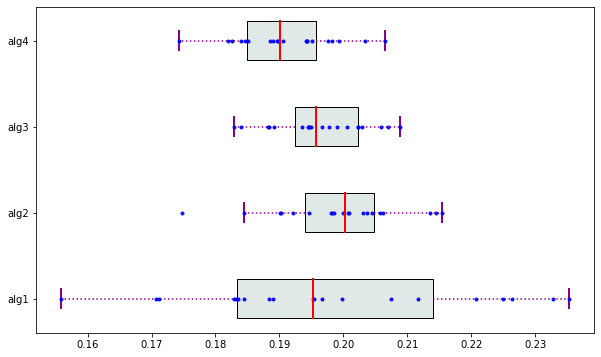

In [10]:
mv.show_measurements_boxplots()

### Algorithm ranking

In [11]:
rank_variants = RankVariants(alg_measurements,h0)

In [12]:
s, mr = rank_variants.calculate_mean_rank()

In [13]:
s

,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q55-q45
case:concept:name,,,,,,,,
alg1,0,0,0,0,0,0,0,1
alg2,0,0,0,0,0,0,0,2
alg3,0,0,0,0,0,0,1,1
alg4,0,0,0,0,0,0,0,0


In [14]:
mr

,case:concept:name,case:mean-rank
3,alg4,0.000
0,alg1,0.125
1,alg2,0.250
2,alg3,0.250
